# Importing Data using YFinance Library

In [3]:
import yfinance as yf
import pandas as pd

nifty50 = yf.Ticker("^NSEI")

historical_data = nifty50.history(period="5y")

csv_filename = "nifty50_data_5years.csv"
historical_data.to_csv(csv_filename)

# Using Regression

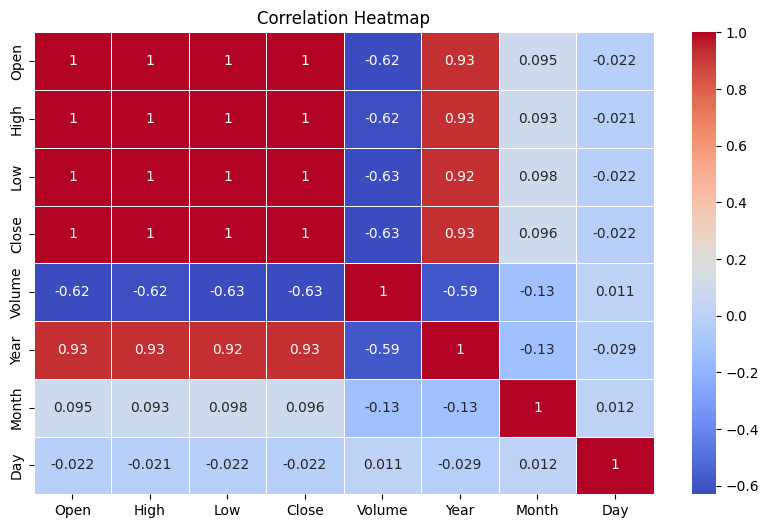

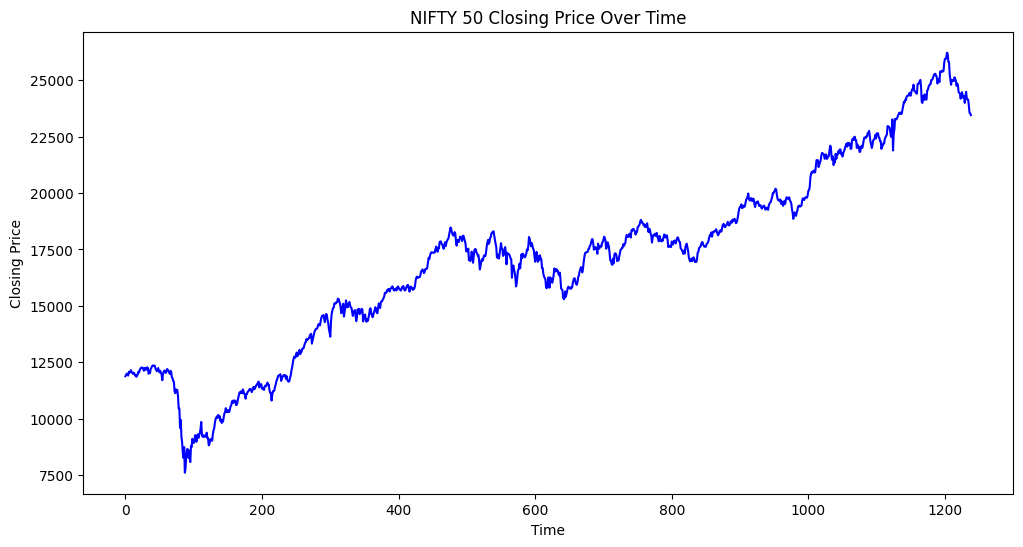

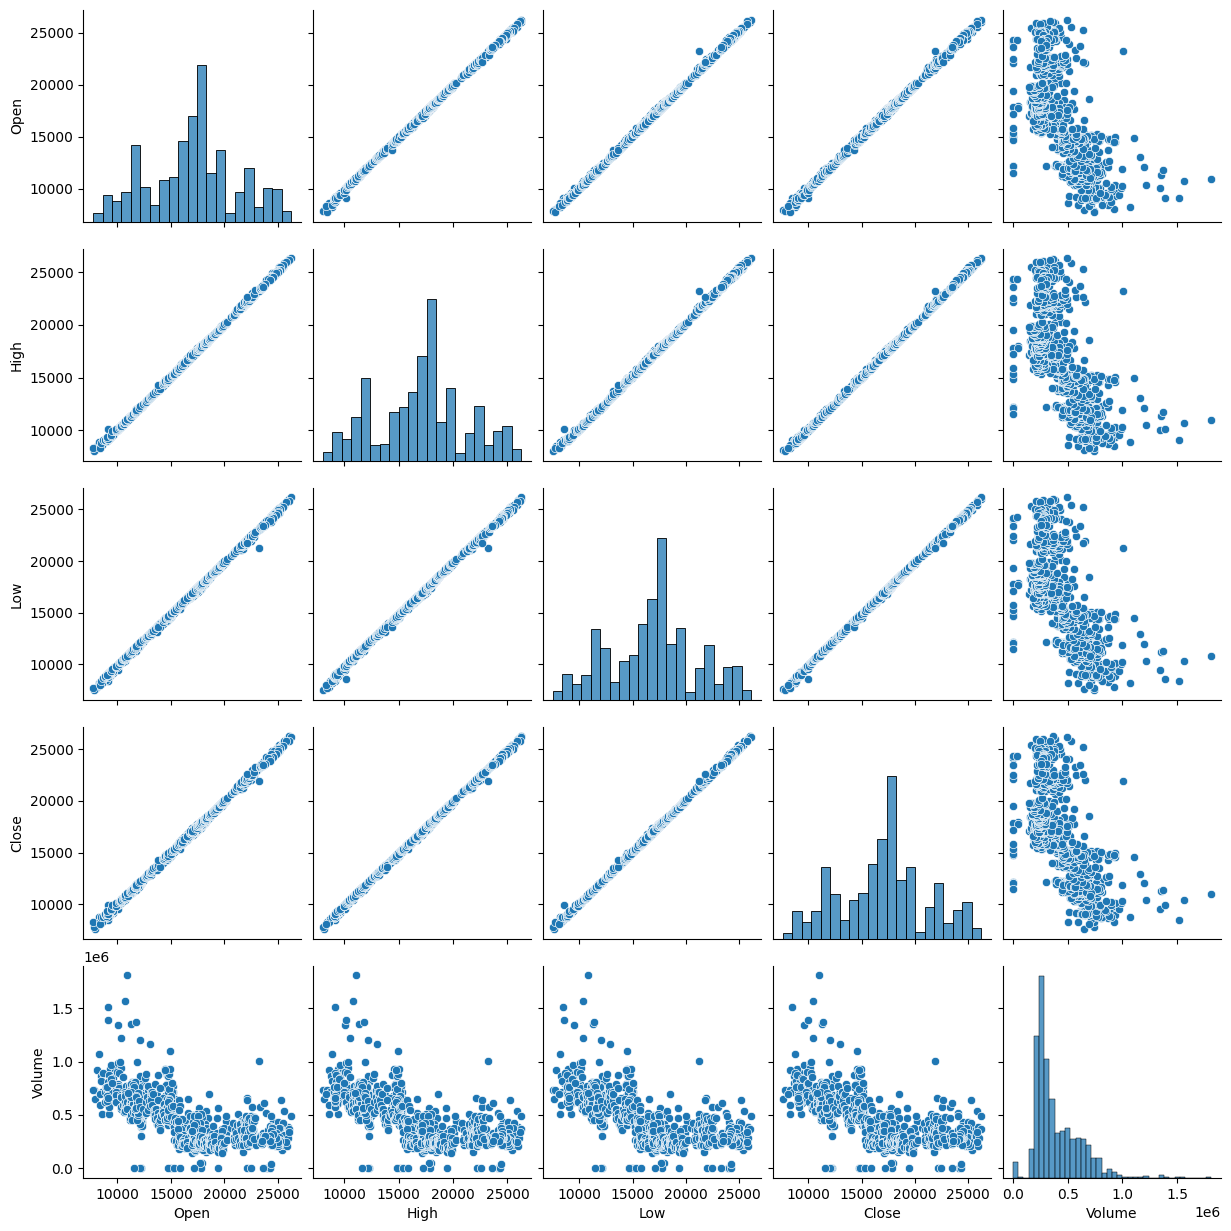

Linear Regression - MSE: 3433.1420353586473, R^2: 0.9997826777211435
SVR - MSE: 15468232.225915935, R^2: 0.020841129613638265
KNN Regression - MSE: 1299117.3906560626, R^2: 0.9177642087243266
Polynomial Regression (degree 2) - MSE: 3935.077482683385, R^2: 0.9997509045657866
                              Model  Mean Squared Error (MSE)  R^2 Score
0                 Linear Regression              3.433142e+03   0.999783
1         Support Vector Regression              1.546823e+07   0.020841
2                    KNN Regression              1.299117e+06   0.917764
3  Polynomial Regression (degree 2)              3.935077e+03   0.999751


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

#Data Pre-Processing

file_path = 'nifty50_data_5years.csv'
nifty50_data = pd.read_csv(file_path)

nifty50_data['Date'] = pd.to_datetime(nifty50_data['Date'])

nifty50_data = nifty50_data.drop(['Dividends', 'Stock Splits'], axis=1)

nifty50_data['Year'] = nifty50_data['Date'].dt.year
nifty50_data['Month'] = nifty50_data['Date'].dt.month
nifty50_data['Day'] = nifty50_data['Date'].dt.day

nifty50_data = nifty50_data.drop(['Date'], axis=1)

#Exploratory Data Analysis (EDA)

plt.figure(figsize=(10, 6))
sns.heatmap(nifty50_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(nifty50_data.index, nifty50_data['Close'], color='blue')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('NIFTY 50 Closing Price Over Time')
plt.show()

sns.pairplot(nifty50_data[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.show()

#Training and Testing Different Models
X = nifty50_data[['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day']]
y = nifty50_data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#1 Linear Regression Model

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression - MSE: {mse}, R^2: {r2}")

#2 Support Vector Regression (SVR)
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVR - MSE: {mse_svr}, R^2: {r2_svr}")

#3 K-Nearest Neighbors (KNN) Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"KNN Regression - MSE: {mse_knn}, R^2: {r2_knn}")

#4 Polynomial Regression (degree 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial Regression (degree 2) - MSE: {mse_poly}, R^2: {r2_poly}")

# Comparing Models

model_performance = {
    'Model': ['Linear Regression', 'Support Vector Regression', 'KNN Regression', 'Polynomial Regression (degree 2)'],
    'Mean Squared Error (MSE)': [mse, mse_svr, mse_knn, mse_poly],
    'R^2 Score': [r2, r2_svr, r2_knn, r2_poly]
}
performance_df = pd.DataFrame(model_performance)
print(performance_df)

# Plots for Predicted Prices vs Actual Prices for Various Models

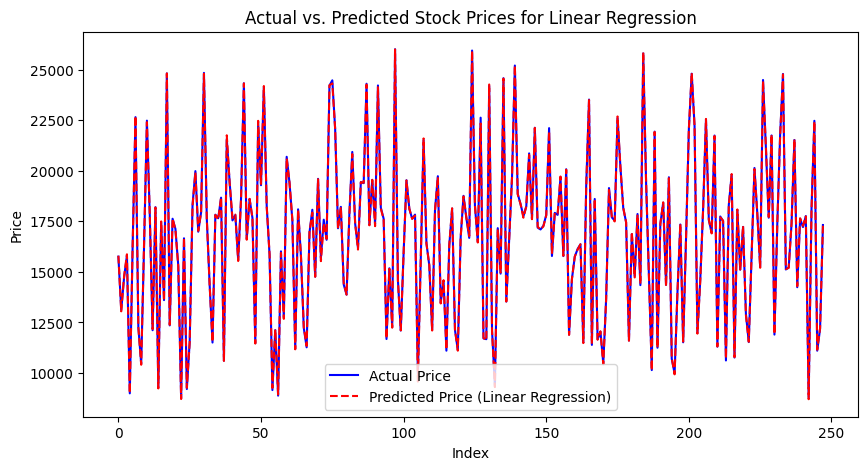

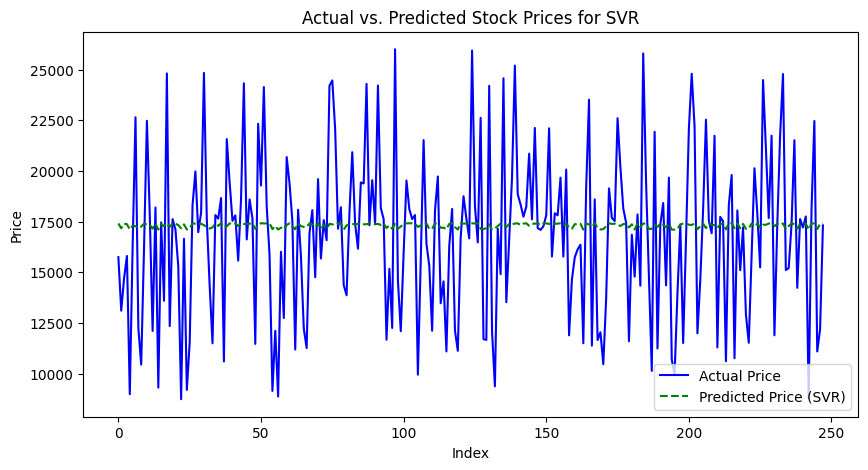

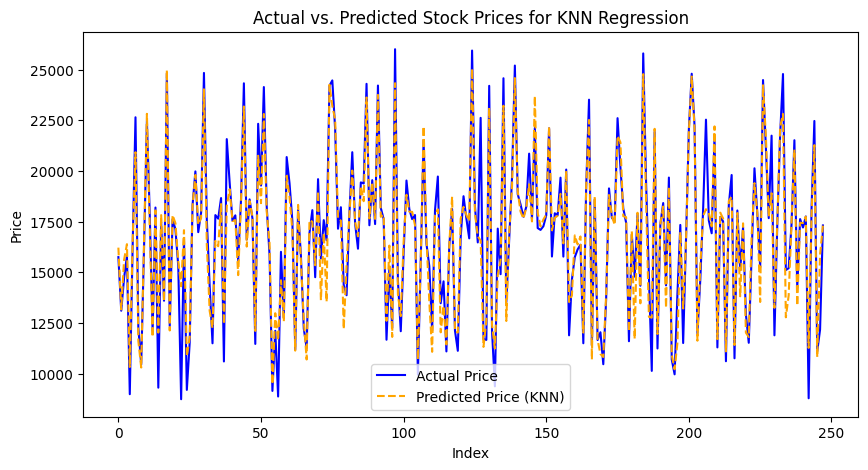

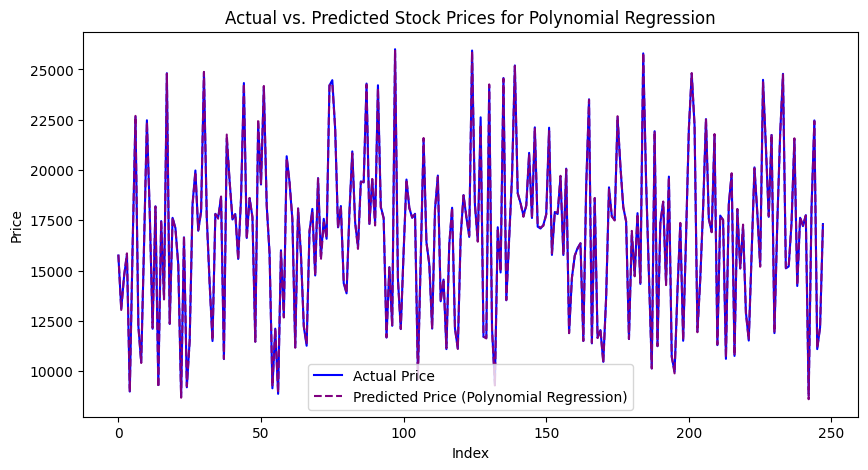

In [6]:
# Prediction using each model
predicted_prices_linear = linear_model.predict(X_test)
predicted_prices_svr = svr_model.predict(X_test)
predicted_prices_knn = knn_model.predict(X_test)
predicted_prices_poly = poly_model.predict(X_test)

#DataFrames for each model's predictions
result_df_linear = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': predicted_prices_linear}).reset_index(drop=True)
result_df_svr = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': predicted_prices_svr}).reset_index(drop=True)
result_df_knn = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': predicted_prices_knn}).reset_index(drop=True)
result_df_poly = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': predicted_prices_poly}).reset_index(drop=True)

#Plot for Linear Regression
plt.figure(figsize=(10, 5))
plt.plot(result_df_linear.index, result_df_linear['Actual Price'], label='Actual Price', color='blue')
plt.plot(result_df_linear.index, result_df_linear['Predicted Price'], label='Predicted Price (Linear Regression)', linestyle='--', color='red')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Prices for Linear Regression')
plt.legend()
plt.show()

#Plot for SVR
plt.figure(figsize=(10, 5))
plt.plot(result_df_svr.index, result_df_svr['Actual Price'], label='Actual Price', color='blue')
plt.plot(result_df_svr.index, result_df_svr['Predicted Price'], label='Predicted Price (SVR)', linestyle='--', color='green')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Prices for SVR')
plt.legend()
plt.show()

#Plot for KNN Regression
plt.figure(figsize=(10, 5))
plt.plot(result_df_knn.index, result_df_knn['Actual Price'], label='Actual Price', color='blue')
plt.plot(result_df_knn.index, result_df_knn['Predicted Price'], label='Predicted Price (KNN)', linestyle='--', color='orange')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Prices for KNN Regression')
plt.legend()
plt.show()

#Plot for Polynomial Regression
plt.figure(figsize=(10, 5))
plt.plot(result_df_poly.index, result_df_poly['Actual Price'], label='Actual Price', color='blue')
plt.plot(result_df_poly.index, result_df_poly['Predicted Price'], label='Predicted Price (Polynomial Regression)', linestyle='--', color='purple')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Prices for Polynomial Regression')
plt.legend()
plt.show()


.

***Linear Regression and Polynomial Regression show the best results.***


.

#Using Classification

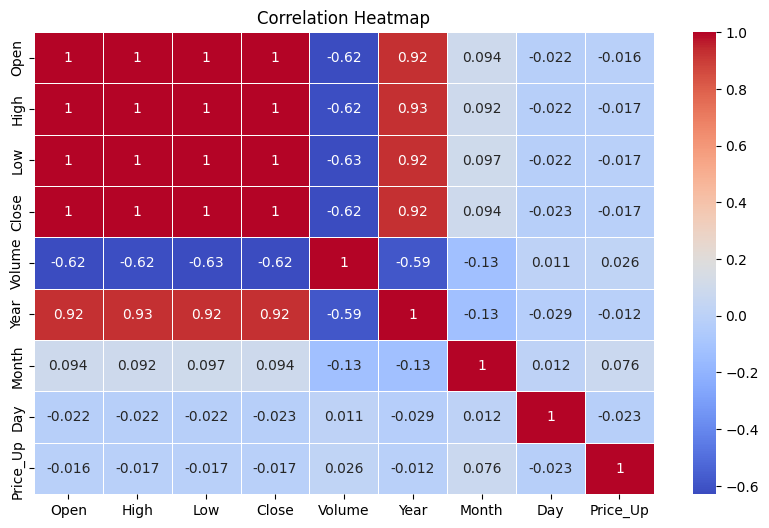

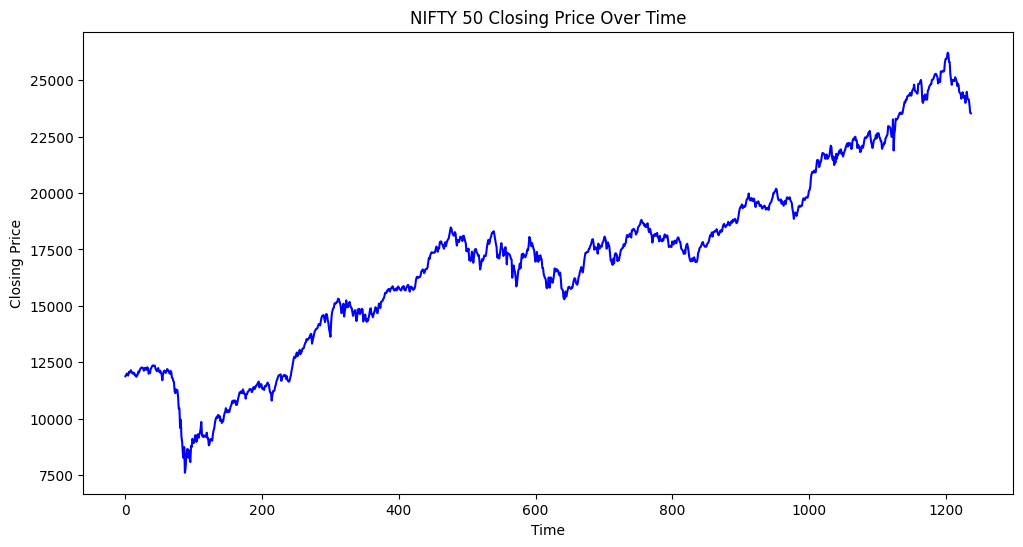

Logistic Regression:
              precision    recall  f1-score   support

           0       0.63      0.26      0.37       103
           1       0.63      0.89      0.74       145

    accuracy                           0.63       248
   macro avg       0.63      0.58      0.55       248
weighted avg       0.63      0.63      0.58       248

Accuracy: 0.6290322580645161
KNN Classification:
              precision    recall  f1-score   support

           0       0.50      0.51      0.50       103
           1       0.65      0.63      0.64       145

    accuracy                           0.58       248
   macro avg       0.57      0.57      0.57       248
weighted avg       0.58      0.58      0.58       248

Accuracy: 0.5806451612903226
SVM Classification:
              precision    recall  f1-score   support

           0       0.61      0.30      0.40       103
           1       0.63      0.86      0.73       145

    accuracy                           0.63       248
   macro 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

#Data Pre-Processing
file_path = 'nifty50_data_5years.csv'
nifty50_data = pd.read_csv(file_path)

nifty50_data['Date'] = pd.to_datetime(nifty50_data['Date'])

nifty50_data = nifty50_data.drop(['Dividends', 'Stock Splits'], axis=1)

nifty50_data['Year'] = nifty50_data['Date'].dt.year
nifty50_data['Month'] = nifty50_data['Date'].dt.month
nifty50_data['Day'] = nifty50_data['Date'].dt.day

nifty50_data = nifty50_data.drop(['Date'], axis=1)

nifty50_data['Price_Up'] = (nifty50_data['Close'].shift(-1) > nifty50_data['Close']).astype(int)

nifty50_data = nifty50_data[:-1]

#Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.heatmap(nifty50_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(nifty50_data.index, nifty50_data['Close'], color='blue')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('NIFTY 50 Closing Price Over Time')
plt.show()

#Training and Testing Different Models
X = nifty50_data[['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day']]
y = nifty50_data['Price_Up']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#1 Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logistic))
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))

#2 K-Nearest Neighbors (KNN) Classification
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("KNN Classification:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

#3 Support Vector Machine (SVM) Classification
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Classification:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

#4 Naive Bayes Classification
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Classification:")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

#5 Random Forest Classification
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Step 4: Comparing Models
model_performance = {
    'Model': ['Logistic Regression', 'KNN Classification', 'SVM Classification', 'Naive Bayes', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_logistic),
                 accuracy_score(y_test, y_pred_knn),
                 accuracy_score(y_test, y_pred_svm),
                 accuracy_score(y_test, y_pred_nb),
                 accuracy_score(y_test, y_pred_rf)]
}
performance_df = pd.DataFrame(model_performance)
print(performance_df)


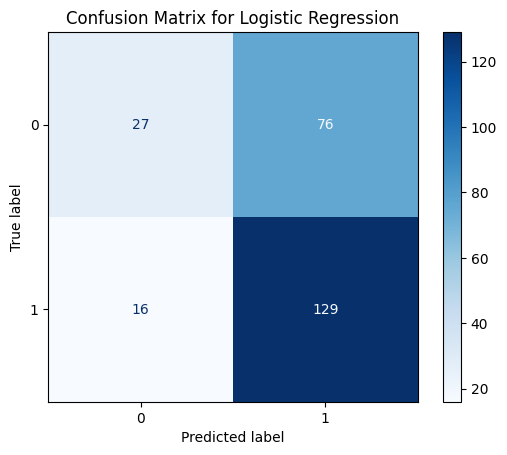

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.63      0.26      0.37       103
           1       0.63      0.89      0.74       145

    accuracy                           0.63       248
   macro avg       0.63      0.58      0.55       248
weighted avg       0.63      0.63      0.58       248



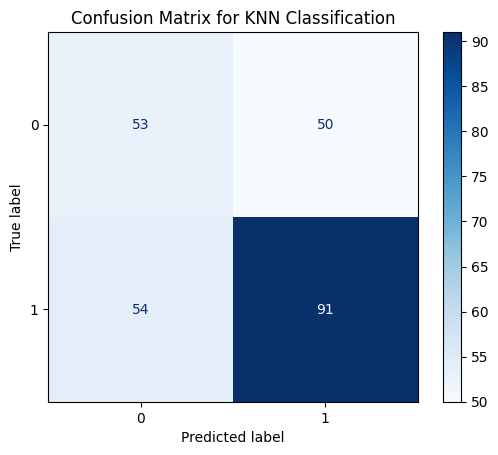

Classification Report for KNN Classification:
               precision    recall  f1-score   support

           0       0.50      0.51      0.50       103
           1       0.65      0.63      0.64       145

    accuracy                           0.58       248
   macro avg       0.57      0.57      0.57       248
weighted avg       0.58      0.58      0.58       248



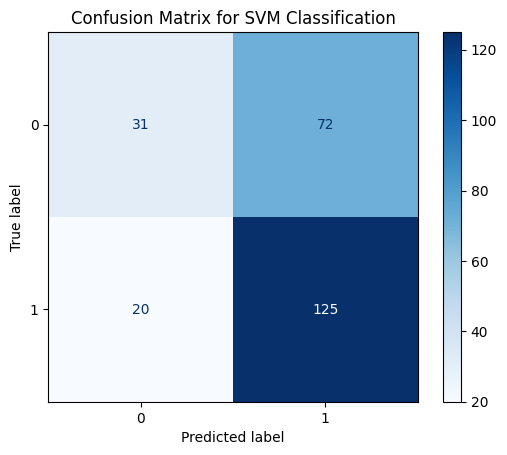

Classification Report for SVM Classification:
               precision    recall  f1-score   support

           0       0.61      0.30      0.40       103
           1       0.63      0.86      0.73       145

    accuracy                           0.63       248
   macro avg       0.62      0.58      0.57       248
weighted avg       0.62      0.63      0.59       248



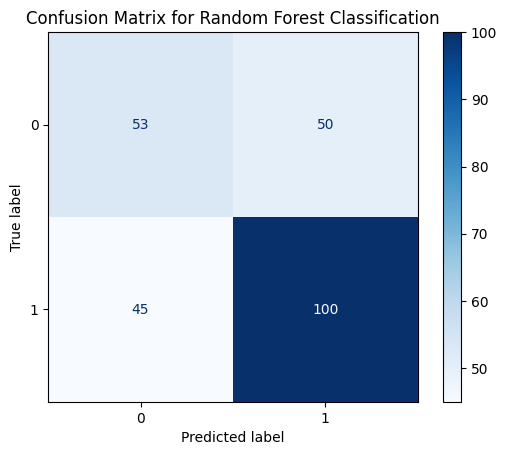

Classification Report for Random Forest Classification:
               precision    recall  f1-score   support

           0       0.54      0.51      0.53       103
           1       0.67      0.69      0.68       145

    accuracy                           0.62       248
   macro avg       0.60      0.60      0.60       248
weighted avg       0.61      0.62      0.62       248



In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

#Predicting with each model
y_pred_logistic = logistic_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Confusion matrix for each model
def plot_confusion(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    print(f"Classification Report for {model_name}:\n", classification_report(y_true, y_pred))

#Plotting confusion matrices for each model
plot_confusion(y_test, y_pred_logistic, "Logistic Regression")
plot_confusion(y_test, y_pred_knn, "KNN Classification")
plot_confusion(y_test, y_pred_svm, "SVM Classification")
plot_confusion(y_test, y_pred_rf, "Random Forest Classification")


.

***Logistic Regression, SVM, and Random Forest Classificiation have the most accuracy***

.